___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

# 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

## Import Libraries

In [ ]:
!pip uninstall ipython

In [160]:
#!pip install pyforest
#!pip install ipython
# 1-Import Libraies

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
%matplotlib notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.compose import make_column_transformer

#Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


#Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#!pip install termcolor
from termcolor import colored
import missingno as msno 

# !pip3 install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

In [161]:
## Useful Functions

###############################################################################

def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

def missing_values(df):
    return missing(df)[missing(df)['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n',
          f"There is ", df.shape[0], " observation and ", df.shape[1], " columns in the dataset.", '\n',
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("duplicates were dropped", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("No duplicates", attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary drop some columns!!!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)
        else:
            print(df.isnull().sum()[i], '%, percentage of missing values of', i ,'less than limit', limit, '%, so we will keep it.')
    print('New shape after missing value control:', df.shape)

###############################################################################


## Load Dataset | Explore Data

In [162]:
# 2-Load|Read Data
with pd.option_context('display.max_columns', None):
    dataset_path = "Mall_Customers.csv"
    df0 = pd.read_csv(dataset_path)
    df = df0.copy() 
    first_looking(df)
    duplicate_values(df)
    drop_columns(df,[])
    drop_null(df, 90)
    # df.head()
    # df.tail()
    # df.sample(5)
    # df.describe().T
    # df.describe(include=object).T

Shape:(200, 5)
There is 200 observation and 5 columns in the dataset.
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
-------------------------------------------------------------------------------
Number of Uniques:
CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64
----------------------------------------------------------

In [163]:
df.head()

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [164]:
df.tail()

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [165]:
df.sample(5)

,customerid,gender,age,annual_income_(k$),spending_score_(1-100)
42,43,Male,48,39,36
196,197,Female,45,126,28
36,37,Female,42,34,17
96,97,Female,47,60,47
126,127,Male,43,71,35


In [166]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customerid,200.000,100.500,57.879,1.000,50.750,100.500,150.250,200.000
age,200.000,38.850,13.969,18.000,28.750,36.000,49.000,70.000
annual_income_(k$),200.000,60.560,26.265,15.000,41.500,61.500,78.000,137.000
spending_score_(1-100),200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


In [167]:
df.describe(include=object).T

,count,unique,top,freq
gender,200,2,Female,112


In [168]:
# to find how many unique values object features have
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"{col} has {df[col].nunique()} unique value")

customerid has 200 unique value
age has 51 unique value
annual_income_(k$) has 64 unique value
spending_score_(1-100) has 84 unique value


In [173]:
drop_columns(df,'customerid')
df

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [175]:
df.columns

Index(['gender', 'age', 'annual_income_(k$)', 'spending_score_(1-100)'], dtype='object')

In [176]:
# 3-Target Examination
target = "gender"

print(colored('-'*79, 'red', attrs=['bold']), '\n',
      colored(f"Target(y):", attrs=['bold']), target, 
      colored(f"\nValue Counts:\n", attrs=['underline']), df[target].value_counts(),'\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')

X_columns = df.drop(target, axis=1).columns
X_numerical = df.drop(target, axis=1).select_dtypes('number').astype('float64')
X_categorical = df.drop(target, axis=1).select_dtypes('object')

print(colored(f"Feature Columns:", attrs=['bold']), list(X_columns),'\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')
print(colored(f"Numerical Columns:", attrs=['bold']), list(X_numerical.columns), '\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')
print(colored(f"Categorical Columns:", attrs=['bold']), list(X_categorical.columns), '\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')
print(colored(f"Number of Uniques:", attrs=['bold']), '\n', X_categorical.nunique(), '\n',
      colored('-'*79, 'red', attrs=['bold']), sep='')

# X_categorical.columns

-------------------------------------------------------------------------------
Target(y):gender
Value Counts:
Female    112
Male       88
Name: gender, dtype: int64
-------------------------------------------------------------------------------
Feature Columns:['age', 'annual_income_(k$)', 'spending_score_(1-100)']
-------------------------------------------------------------------------------
Numerical Columns:['age', 'annual_income_(k$)', 'spending_score_(1-100)']
-------------------------------------------------------------------------------
Categorical Columns:[]
-------------------------------------------------------------------------------
Number of Uniques:
Series([], dtype: float64)
-------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


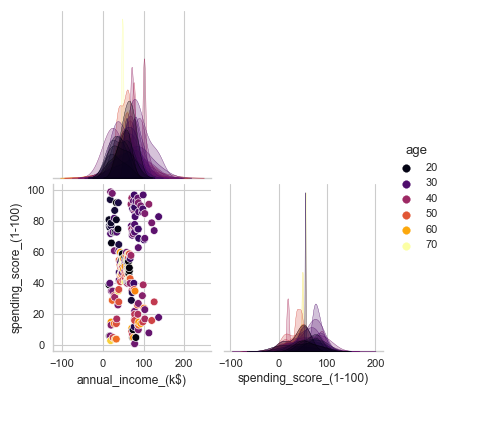

In [177]:
sns.pairplot(df, palette="inferno", hue="age", corner=True);

<IPython.core.display.Javascript object>


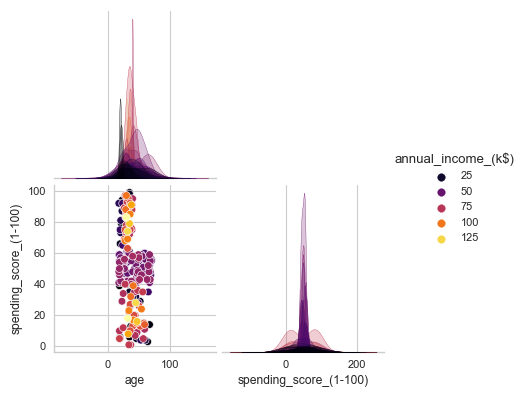

In [178]:
sns.pairplot(df, palette="inferno", hue="annual_income_(k$)", corner=True);

<IPython.core.display.Javascript object>


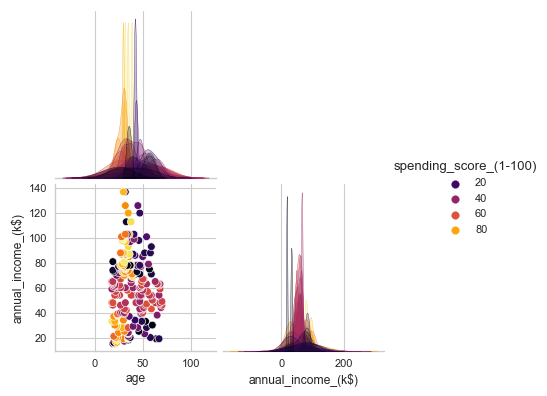

In [179]:
sns.pairplot(df, palette="inferno", hue="spending_score_(1-100)", corner=True);

<IPython.core.display.Javascript object>


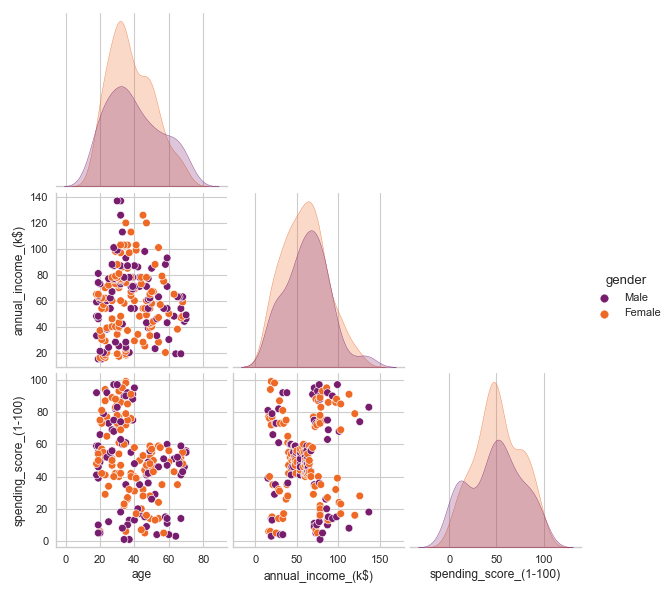

In [180]:
sns.pairplot(df, palette="inferno", hue="gender", corner=True);

In [181]:
fig = px.scatter_3d(df, 
                    x="annual_income_(k$)",
                    y="spending_score_(1-100)",
                    z="age",
                    color='gender')
fig.show();

<IPython.core.display.Javascript object>

In [ ]:
# with pd.option_context('display.max_columns', None):
#     plt.figure(figsize=(16, 30))
#     sns.barplot(y = "annual_income_(k$)", x = df.index, data = df, orient="h");

In [ ]:
# plt.figure(figsize=(16, 30))
# sns.barplot(y = "spending_score_(1-100)", x = df.index, data = df, orient="h");

In [182]:
df.shape

(200, 4)

In [183]:
X_numerical.iplot(kind='bar');

In [185]:
X_numerical.iplot(kind='histogram',subplots=True,bins=50);

In [186]:
for i in df.drop(columns=[target]).columns:
    df[i].iplot(kind="box", title=i, boxpoints="all", color='lightseagreen')

<IPython.core.display.Javascript object>


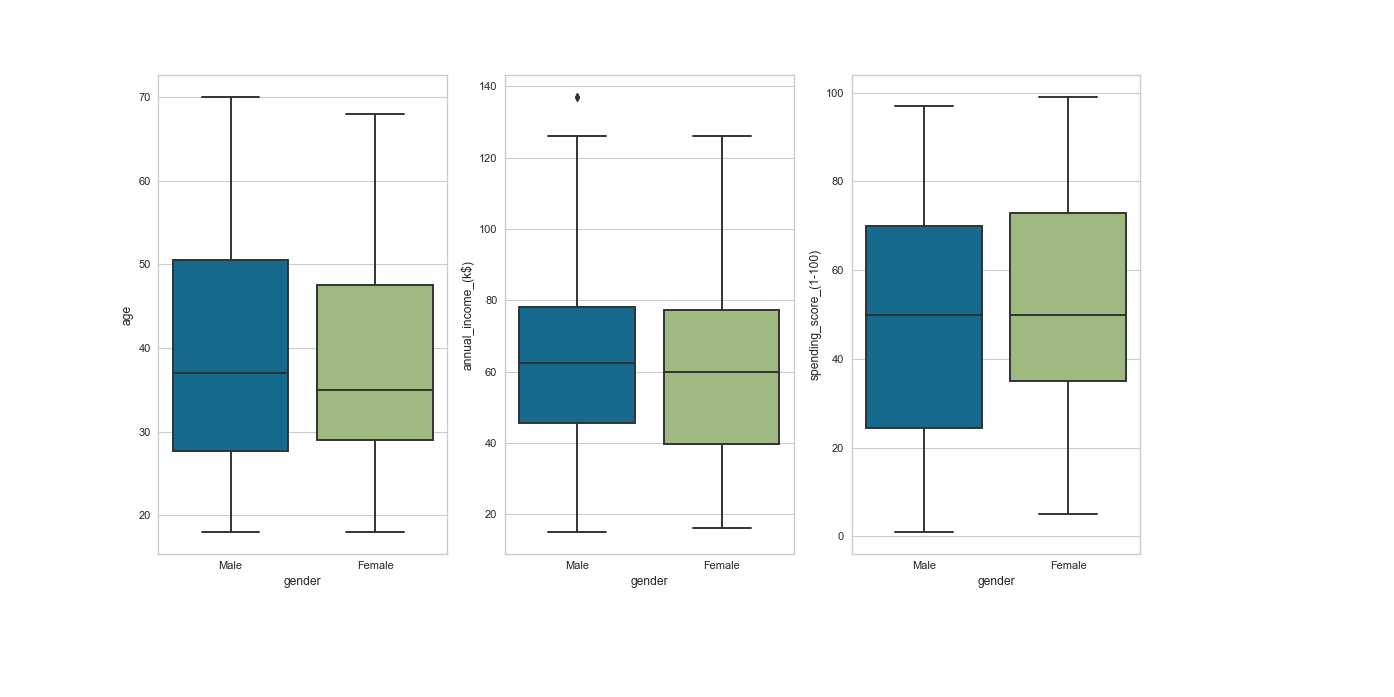

In [187]:
index = 0
plt.figure(figsize=(16, 8))
for feature in df.columns:
    if feature != target:
        index += 1
        plt.subplot(1, 3, index)
        sns.boxplot(x=target, y=feature, data=df)

In [188]:
df.corr().style.background_gradient(cmap='RdPu')

,age,annual_income_(k$),spending_score_(1-100)
age,1.000000,-0.012398,-0.327227
annual_income_(k$),-0.012398,1.000000,0.009903
spending_score_(1-100),-0.327227,0.009903,1.000000


In [189]:
X_numerical.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
age,200.000000,38.850000,13.969007,18.000000,28.750000,36.000000,49.000000,70.000000
annual_income_(k$),200.000000,60.560000,26.264721,15.000000,41.500000,61.500000,78.000000,137.000000
spending_score_(1-100),200.000000,50.200000,25.823522,1.000000,34.750000,50.000000,73.000000,99.000000


In [190]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

age                       0.486
annual_income_(k$)        0.322
spending_score_(1-100)   -0.047
dtype: float64

In [191]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = X_numerical.skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

Series([], dtype: float64)

In [192]:
#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, 
               '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew,
               '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m',
               "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   0.48556885096681657  means that the distribution is approx.   symmetric 
A skewness value of   0.3218425498619055  means that the distribution is approx.   symmetric 
A skewness value of   -0.047220201374263374  means that the distribution is approx.   symmetric 


In [193]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

annual_income_(k$)       -0.098
age                      -0.672
spending_score_(1-100)   -0.827
dtype: float64

In [194]:
#Calculating Kurtosis 

kurtosis_limit = 7 
# This is our threshold-limit to evaluate skewness.
# Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

Series([], dtype: float64)

In [195]:
df.groupby("age")['annual_income_(k$)'].mean().sort_values(ascending=False).iplot(kind='bar');

In [196]:
df.groupby("age")['annual_income_(k$)'].mean().sort_values(ascending=False).nlargest(10)

age
41   101.000
32    87.182
28    85.250
36    81.000
33    80.333
56    79.000
34    79.000
30    76.143
44    75.500
38    74.500
Name: annual_income_(k$), dtype: float64

In [197]:
df.groupby("age")['annual_income_(k$)'].mean().sort_values(ascending=False).nsmallest(10)

age
64   19.000
22   31.333
21   38.800
24   39.250
53   39.500
23   41.500
20   41.600
60   43.333
69   44.000
67   45.500
Name: annual_income_(k$), dtype: float64

In [198]:
df.groupby("age")['spending_score_(1-100)'].mean().sort_values(ascending=False).iplot(kind="bar");

In [199]:
df.groupby("age")['spending_score_(1-100)'].mean().sort_values(ascending=False).nlargest(10)

age
39   84.667
30   80.286
29   76.600
24   71.500
22   70.000
28   70.000
21   66.800
32   66.000
35   63.889
31   63.875
Name: spending_score_(1-100), dtype: float64

In [200]:
df.groupby("age")['spending_score_(1-100)'].mean().sort_values(ascending=False).nsmallest(10)

age
64    3.000
44   13.500
58   15.000
37   15.333
42   18.500
52   21.000
46   21.333
53   25.000
57   28.000
41   28.000
Name: spending_score_(1-100), dtype: float64

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [201]:
df1 = df.drop(['gender', 'annual_income_(k$)'], axis=1)
df1.head()

,age,spending_score_(1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [202]:
from pyclustertend import hopkins
hopkins(df1, df1.shape[0])

# from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
# hopkins(scale(df1), df.shape[0])
# hopkins(MinMaxScaler().fit_transform(df_), df1.shape[0])
# hopkins(StandardScaler().fit_transform(df_), df1.shape[0])
# we don't need scale dataset

0.2907832499860276

#### *ii. Determine optimal number of clusters*

In [203]:
KMeans(random_state = 101).fit_predict(df1)

array([0, 3, 6, 3, 0, 3, 6, 2, 5, 3, 5, 2, 5, 3, 6, 3, 1, 3, 1, 2, 1, 3,
       5, 3, 5, 2, 1, 3, 1, 2, 5, 3, 5, 2, 5, 3, 5, 3, 1, 3, 7, 2, 1, 3,
       1, 3, 4, 0, 0, 0, 4, 3, 0, 7, 4, 4, 4, 7, 0, 4, 7, 0, 7, 4, 7, 0,
       4, 7, 0, 0, 7, 4, 7, 7, 7, 0, 4, 4, 0, 4, 7, 4, 7, 4, 0, 4, 4, 0,
       3, 4, 7, 0, 4, 1, 0, 0, 4, 0, 4, 0, 0, 4, 7, 0, 4, 0, 7, 4, 7, 7,
       7, 0, 1, 0, 0, 0, 7, 4, 4, 4, 0, 1, 4, 2, 1, 3, 1, 2, 5, 3, 5, 3,
       0, 3, 6, 2, 5, 3, 6, 3, 5, 2, 0, 2, 6, 2, 1, 3, 1, 2, 5, 2, 5, 3,
       5, 2, 6, 3, 6, 3, 1, 2, 6, 2, 1, 3, 1, 2, 1, 3, 5, 3, 6, 2, 5, 2,
       5, 3, 5, 2, 1, 2, 5, 2, 1, 2, 5, 3, 5, 2, 1, 3, 6, 2, 5, 3, 1, 3,
       6, 2])

##### Elbow Method , we use this method to find optimal k value by looking up to break point of graph. 

<IPython.core.display.Javascript object>


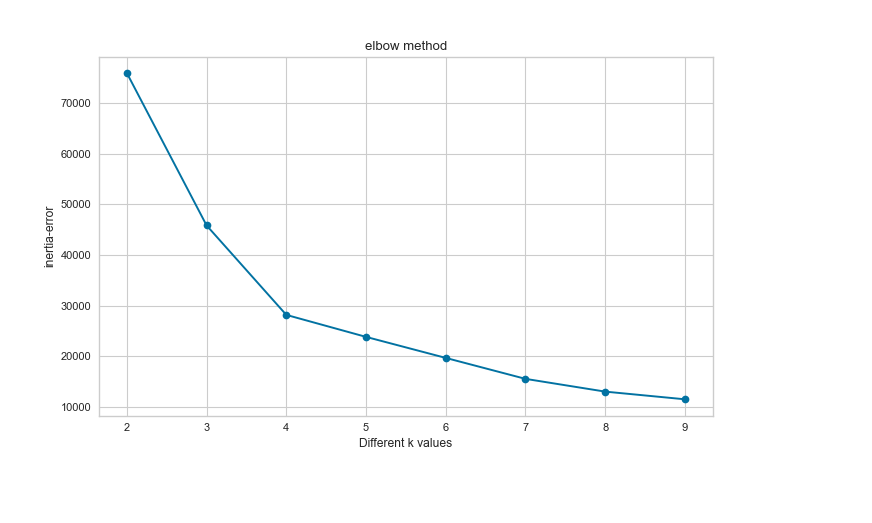

Text(0.5, 1.0, 'elbow method')

In [204]:
ssd = []
K = range(2,10)
for k in K:
    ssd.append(KMeans(n_clusters =k, random_state=101).fit(df1).inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [205]:
ssd # sum of squared distance

[75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23818.848251581334,
 19664.73951714552,
 15523.684014328754,
 13002.4664883828,
 11486.150087792637]

In [206]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479
3,17675.093
4,4346.735
5,4154.109
6,4141.056
7,2521.218
8,1516.316


<IPython.core.display.Javascript object>


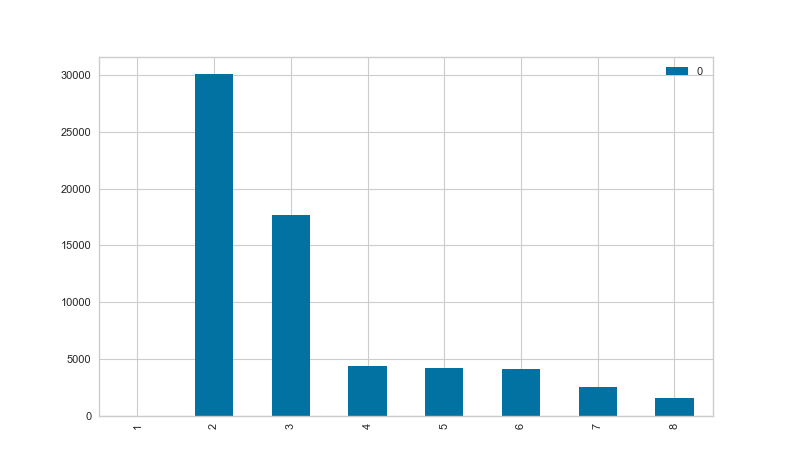

In [207]:
df_diff.plot(kind='bar');

<IPython.core.display.Javascript object>


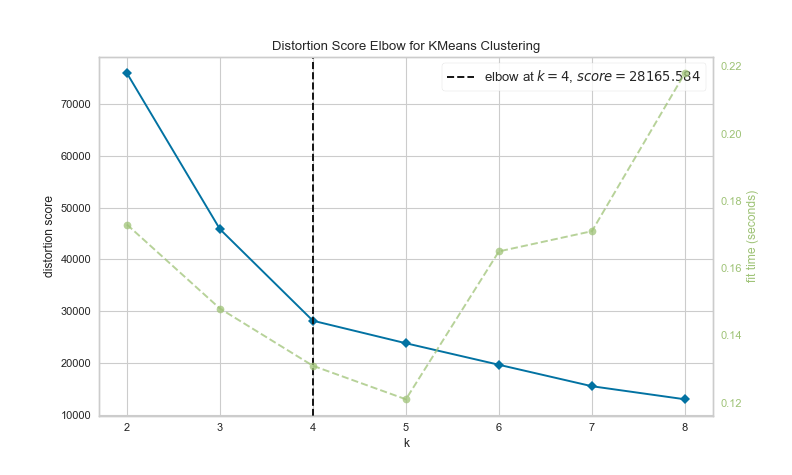

In [208]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=101), k=(2,9))
visualizer.fit(df1)        # Fit the data to the visualizer
visualizer.show();

In [209]:
from sklearn.metrics import silhouette_score
silhouette_score(df1, KMeans(random_state = 101).fit_predict(df1))

0.4331607448298594

In [210]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    silhouette_ = silhouette_score(df1, 
                                      KMeans(n_clusters=num_clusters, random_state=101).fit_predict(df1))
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.46342248553207704
For n_clusters=6, the silhouette score is 0.4235290823884998
For n_clusters=7, the silhouette score is 0.4212938931368575
For n_clusters=8, the silhouette score is 0.4331607448298594


<IPython.core.display.Javascript object>


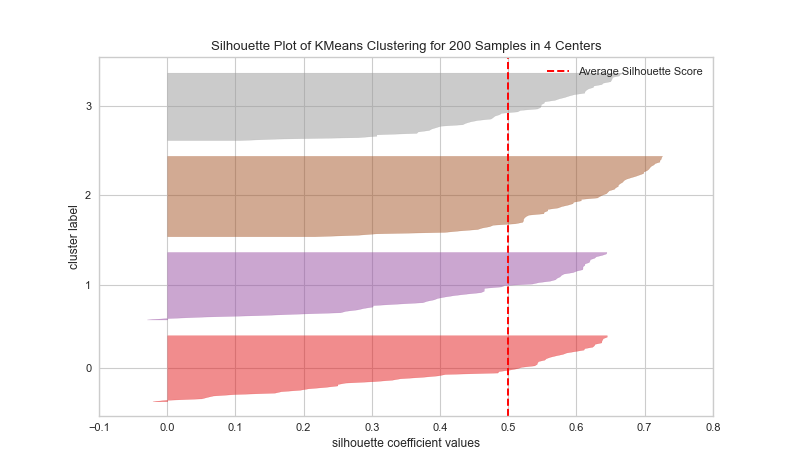

In [222]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=101))
visualizer.fit(df1)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [223]:
KMeans(n_clusters =4, random_state=101).fit_predict(df1)

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0,
       1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 0,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0,
       0, 3, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 2, 0, 2, 3, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [224]:
df1["predicted_clusters1_as"] = KMeans(n_clusters =4, random_state=101).fit_predict(df1)
df1

,age,spending_score_(1-100),predicted_clusters1_as
0,19,39,0
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,0
5,22,76,2
6,35,6,1
7,23,94,2
8,64,3,1
9,30,72,2


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [225]:
df2 = df.drop(['gender', 'age'], axis=1)
df2.head()

,annual_income_(k$),spending_score_(1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [226]:
hopkins(df2, df2.shape[0])

0.29958731563695234

#### *ii. Determine optimal number of clusters*

In [227]:
KMeans(random_state = 101).fit_predict(df2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 7, 3, 7, 7,
       4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 1, 7, 1, 7, 7, 1, 1, 7, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5,
       1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2])

##### Elbow Method , we use this method to find optimal k value by looking up to break point of graph. 

<IPython.core.display.Javascript object>


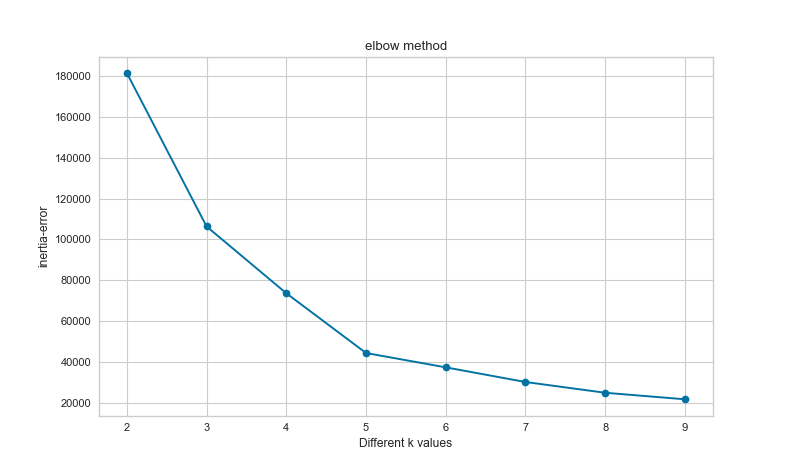

Text(0.5, 1.0, 'elbow method')

In [228]:
ssd = []
K = range(2,10)
for k in K:
    ssd.append(KMeans(n_clusters =k, random_state=101).fit(df2).inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [229]:
ssd # sum of squared distance

[181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37442.24745037571,
 30273.394312070028,
 25011.920255473764,
 21818.11458845217]

In [230]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.223
3,32668.584
4,29231.334
5,7006.208
6,7168.853
7,5261.474
8,3193.806


<IPython.core.display.Javascript object>


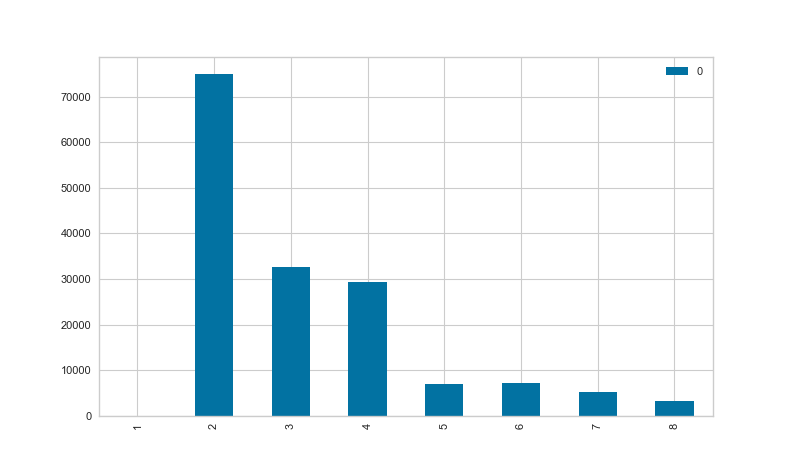

In [231]:
df_diff.plot(kind='bar');

<IPython.core.display.Javascript object>


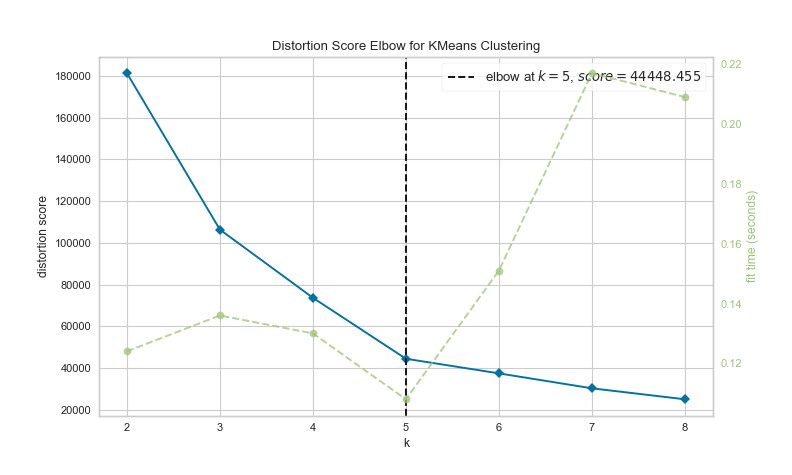

In [232]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=101), k=(2,9))
visualizer.fit(df2)        # Fit the data to the visualizer
visualizer.show();

In [233]:
from sklearn.metrics import silhouette_score
silhouette_score(df2, KMeans(random_state = 101).fit_predict(df2))

0.4551839202075395

In [234]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    silhouette_ = silhouette_score(df2, 
                                      KMeans(n_clusters=num_clusters, random_state=101).fit_predict(df2))
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.5367558067779578
For n_clusters=7, the silhouette score is 0.5270287298101395
For n_clusters=8, the silhouette score is 0.4551839202075395


In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=101))
visualizer.fit(df2)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [235]:
KMeans(n_clusters = 5, random_state=101).fit_predict(df2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [236]:
df2["predicted_clusters2_is"] = KMeans(n_clusters =5, random_state=101).fit_predict(df2)
df2

,annual_income_(k$),spending_score_(1-100),predicted_clusters2_is
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
5,17,76,3
6,18,6,4
7,18,94,3
8,19,3,4
9,19,72,3


### Clustering based on Annual Income and Age

#### *i. Create a new dataset with two variables of your choice*

In [237]:
df3 = df.drop(['gender', 'spending_score_(1-100)'], axis=1)
df3.head()

,age,annual_income_(k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [238]:
hopkins(df3, df3.shape[0])

0.33337867726684683

#### *ii. Determine optimal number of clusters*

In [239]:
KMeans(random_state = 101).fit_predict(df3)

array([0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 7, 0, 7, 0, 0, 0, 0, 0, 7, 0, 0, 0,
       7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 6, 7, 6, 7, 6, 6, 6, 7, 6, 7, 6,
       7, 6, 7, 6, 6, 6, 7, 6, 6, 7, 7, 7, 7, 4, 6, 7, 4, 6, 4, 7, 4, 6,
       7, 4, 6, 6, 4, 7, 4, 4, 4, 6, 1, 1, 6, 1, 4, 1, 4, 1, 6, 1, 4, 3,
       1, 1, 4, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 4, 3, 1, 3, 4, 1, 4, 4,
       4, 3, 1, 3, 3, 3, 4, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5,
       5, 5])

##### Elbow Method , we use this method to find optimal k value by looking up to break point of graph. 

<IPython.core.display.Javascript object>


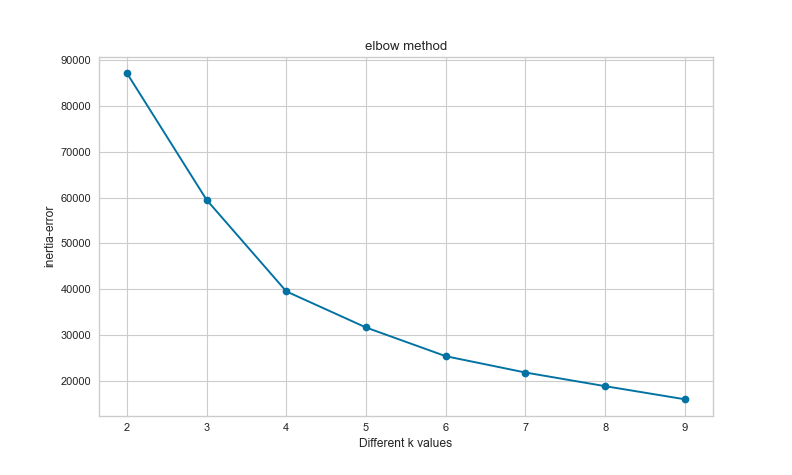

Text(0.5, 1.0, 'elbow method')

In [240]:
ssd = []
K = range(2,10)
for k in K:
    ssd.append(KMeans(n_clusters =k, random_state=101).fit(df3).inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [241]:
ssd # sum of squared distance

[87121.56591478694,
 59486.961439280356,
 39529.887967363524,
 31659.353138717805,
 25399.022004416987,
 21839.63551628551,
 18864.876029385057,
 16004.320940988831]

In [242]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,27634.604
3,19957.073
4,7870.535
5,6260.331
6,3559.386
7,2974.759
8,2860.555


<IPython.core.display.Javascript object>


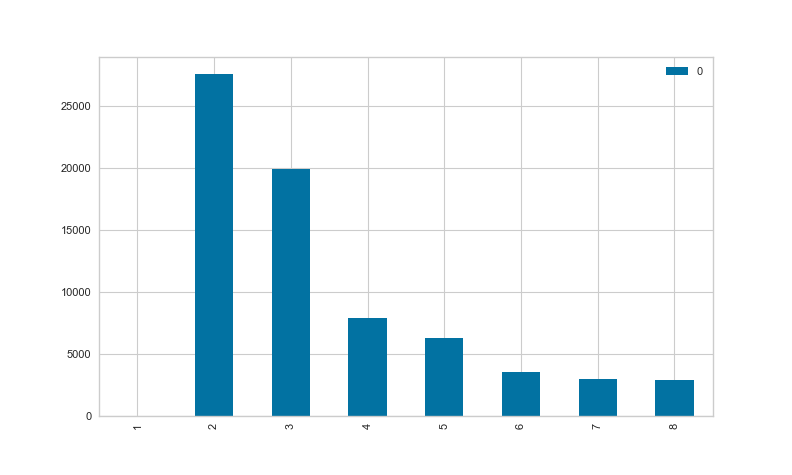

In [243]:
df_diff.plot(kind='bar');

<IPython.core.display.Javascript object>


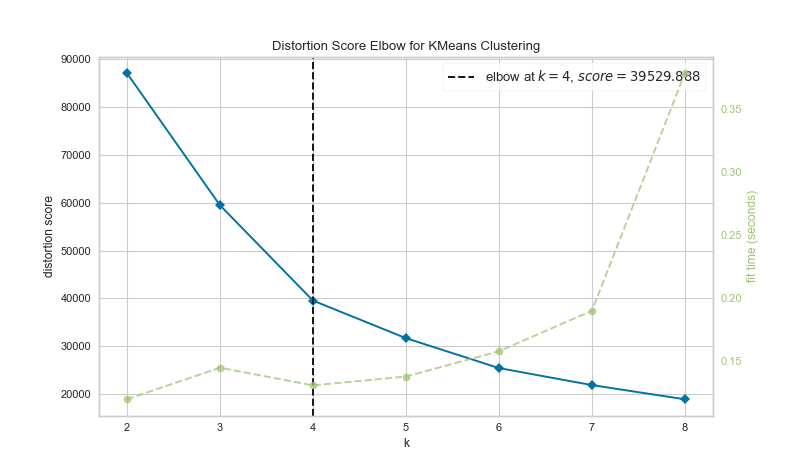

In [244]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(random_state=101), k=(2,9))
visualizer.fit(df3)        # Fit the data to the visualizer
visualizer.show();

In [245]:
from sklearn.metrics import silhouette_score
silhouette_score(df3, KMeans(random_state = 101).fit_predict(df3))

0.394180001823819

In [246]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    silhouette_ = silhouette_score(df3, 
                                      KMeans(n_clusters=num_clusters, random_state=101).fit_predict(df3))
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_}")

For n_clusters=2, the silhouette score is 0.42620850066216065
For n_clusters=3, the silhouette score is 0.4254725038202792
For n_clusters=4, the silhouette score is 0.43295184273333076
For n_clusters=5, the silhouette score is 0.40157587536205724
For n_clusters=6, the silhouette score is 0.3959805131239844
For n_clusters=7, the silhouette score is 0.3840192204022327
For n_clusters=8, the silhouette score is 0.394180001823819


<IPython.core.display.Javascript object>


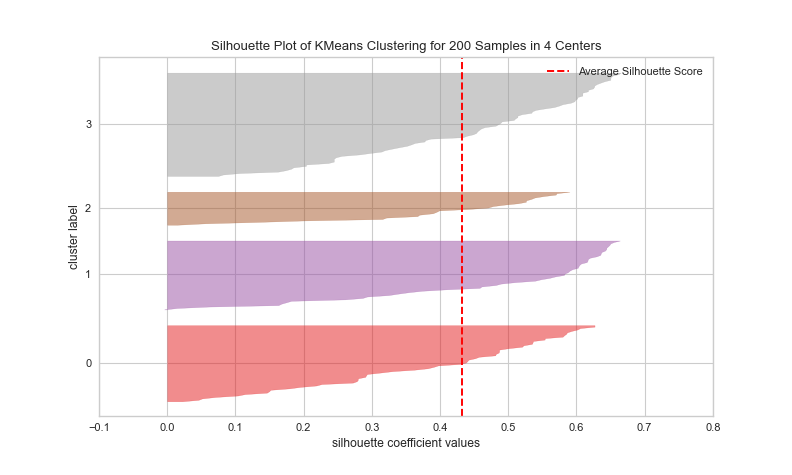

In [247]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=101))
visualizer.fit(df3)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [250]:
KMeans(n_clusters =4, random_state=101).fit_predict(df3)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

#### *iv. Visualizing and Labeling All the Clusters*

In [251]:
df3["predicted_clusters3_ia"] = KMeans(n_clusters =4, random_state=101).fit_predict(df3)
df3

,age,annual_income_(k$),predicted_clusters3_ia
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1
5,22,17,1
6,35,18,1
7,23,18,1
8,64,19,0
9,30,19,1


##### Compare all three clusters

In [252]:
a = df1["predicted_clusters1_as"]
b = df2["predicted_clusters2_is"]
c = df3["predicted_clusters3_ia"]


df= df.join([a, b, c])
df

,gender,age,annual_income_(k$),spending_score_(1-100),predicted_clusters1_as,predicted_clusters2_is,predicted_clusters3_ia
0,Male,19,15,39,0,4,1
1,Male,21,15,81,2,3,1
2,Female,20,16,6,1,4,1
3,Female,23,16,77,2,3,1
4,Female,31,17,40,0,4,1
5,Female,22,17,76,2,3,1
6,Female,35,18,6,1,4,1
7,Female,23,18,94,2,3,1
8,Male,64,19,3,1,4,0
9,Female,30,19,72,2,3,1


In [255]:
fig = px.scatter_3d(x=df["age"],
                    y=df["annual_income_(k$)"],
                    z=df["spending_score_(1-100)"],
                   color=df["predicted_clusters1_as"],
                   labels = {"x": "age",
                             "y": "annual_income_(k$)",
                             "z": "spending_score_(1-100)"},
                   hover_name=df["gender"])

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


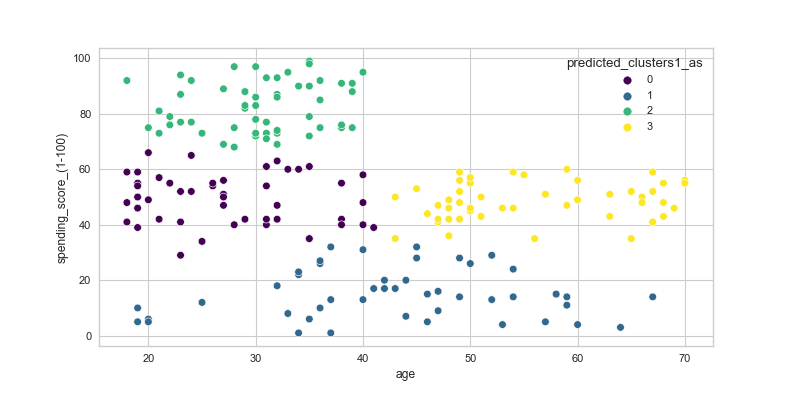

In [256]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["annual_income_(k$)"], 
                df["spending_score_(1-100)"], hue= df["predicted_clusters1_as"], palette= "viridis");


<IPython.core.display.Javascript object>


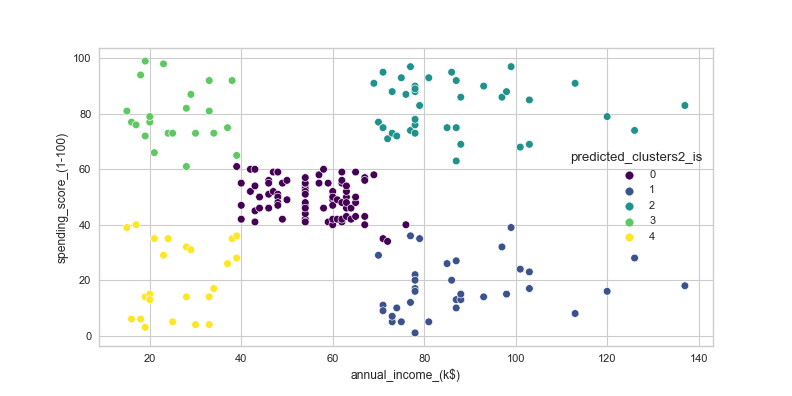

In [258]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["annual_income_(k$)"], 
                df["spending_score_(1-100)"], hue= df["predicted_clusters2_is"], palette= "viridis");

<IPython.core.display.Javascript object>


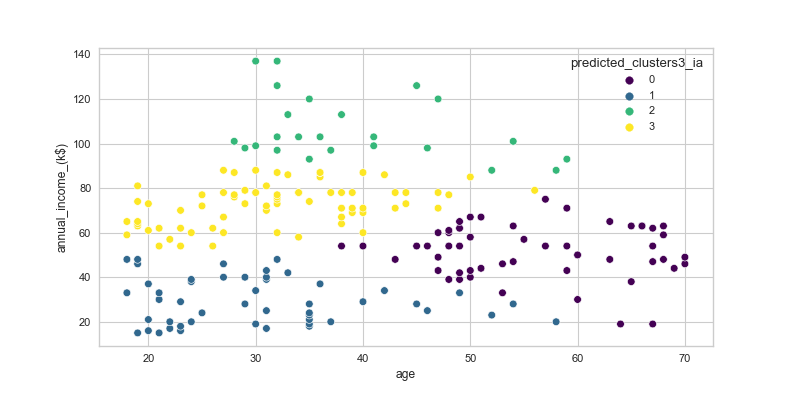

In [260]:
plt.figure(figsize=(10,5))
sns.scatterplot(df["age"],
                df["annual_income_(k$)"],
                hue= df["predicted_clusters3_ia"], palette= "viridis");

In [262]:
df["predicted_clusters1_as"].value_counts()

2    57
1    48
3    48
0    47
Name: predicted_clusters1_as, dtype: int64

In [265]:
df["predicted_clusters2_is"].value_counts()

0    81
2    39
1    35
4    23
3    22
Name: predicted_clusters2_is, dtype: int64

In [267]:
df["predicted_clusters3_ia"].value_counts()

3    73
0    54
1    49
2    24
Name: predicted_clusters3_ia, dtype: int64

<IPython.core.display.Javascript object>


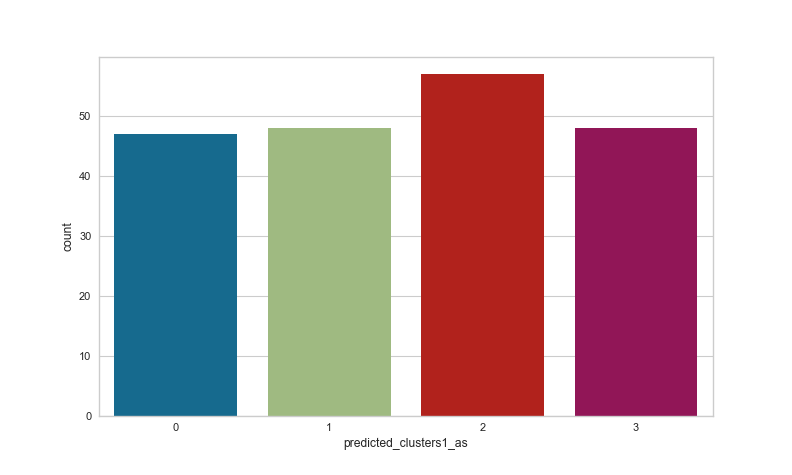

<AxesSubplot:xlabel='predicted_clusters1_as', ylabel='count'>

In [270]:
sns.countplot(x=df["predicted_clusters1_as"], data=df1)

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

<IPython.core.display.Javascript object>


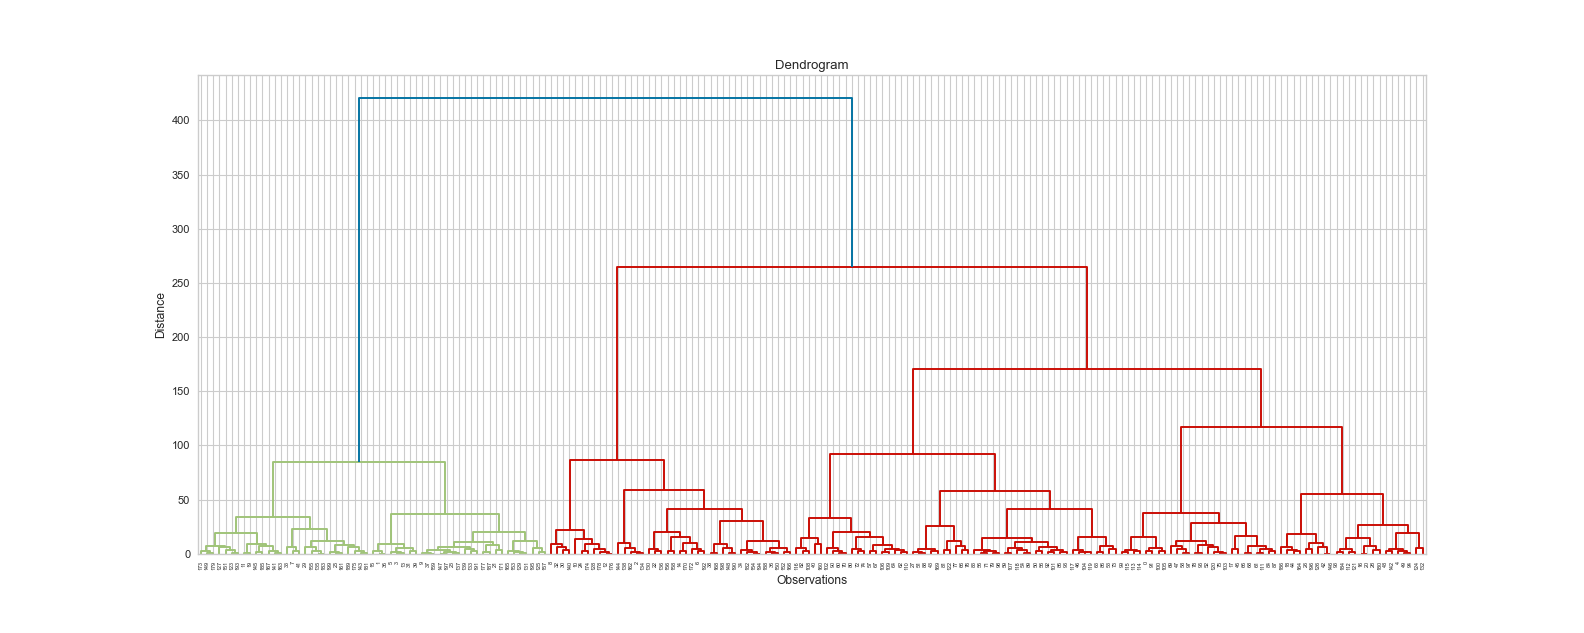

In [272]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(df1, method = "ward"), leaf_font_size = 5);

<IPython.core.display.Javascript object>


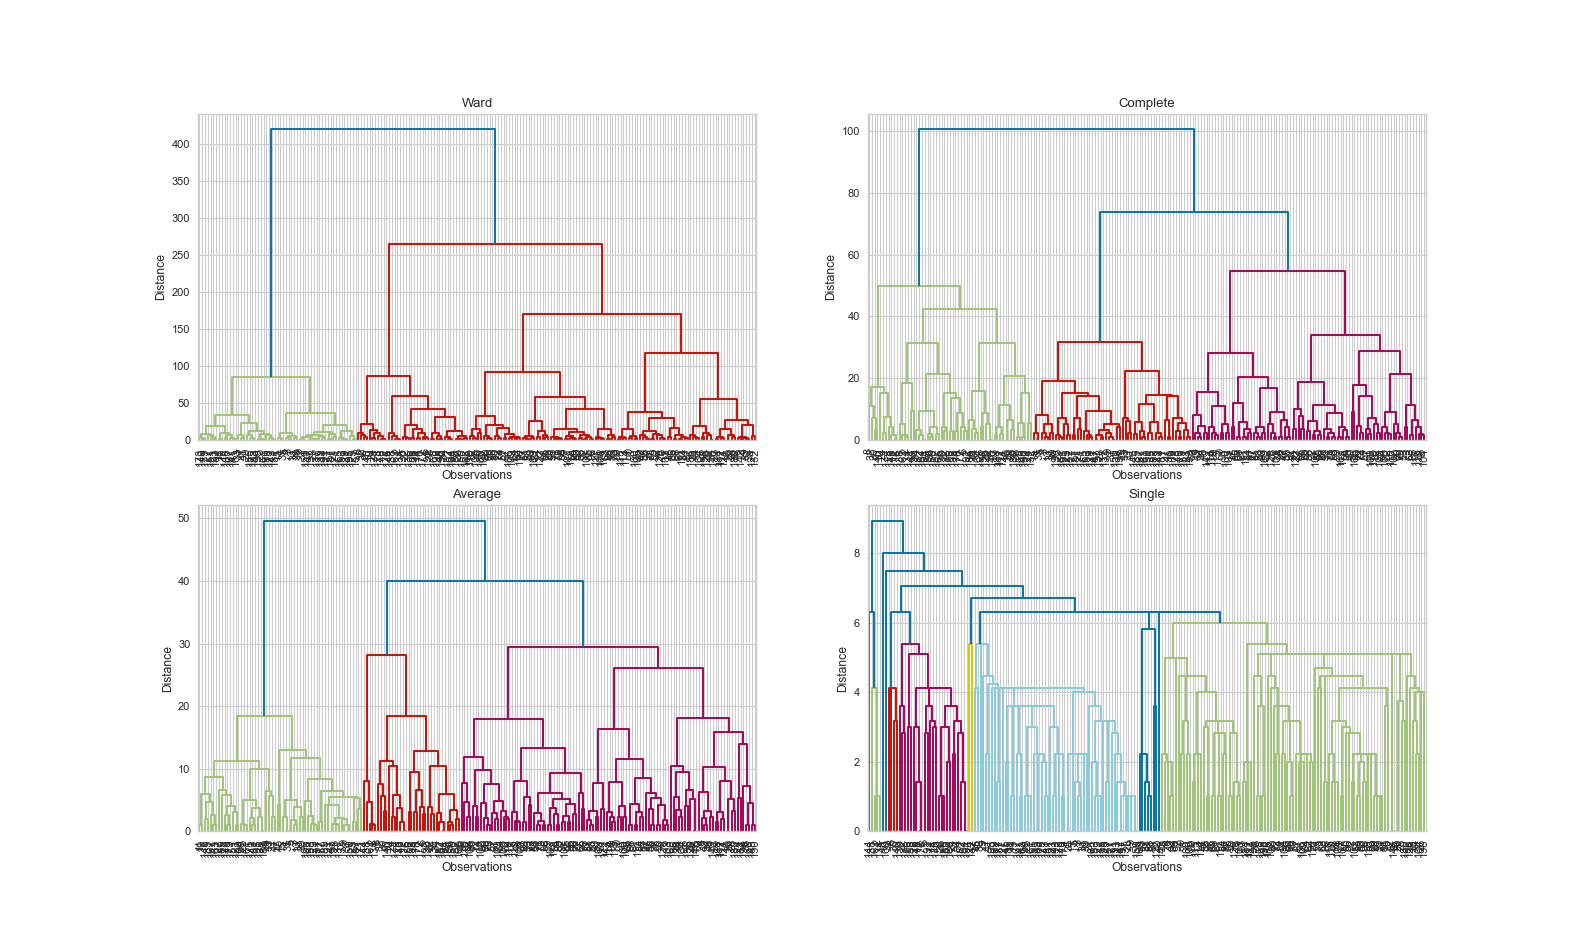

In [273]:
hc_ward = linkage(y = df1, method = "ward")
hc_complete = linkage(df1, "complete")
hc_average = linkage(df1, "average")
hc_single = linkage(df1, "single")

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [274]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                           affinity='euclidean', 
                                           linkage='ward').fit_predict(df1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df1, model_labels)}')

Silhouette Score for 2 clusters: 0.45454592584148096
Silhouette Score for 3 clusters: 0.4406245222112989
Silhouette Score for 4 clusters: 0.4608405468661758
Silhouette Score for 5 clusters: 0.4043739061256346
Silhouette Score for 6 clusters: 0.4125751937244674
Silhouette Score for 7 clusters: 0.4158018450743115
Silhouette Score for 8 clusters: 0.3881443379710403
Silhouette Score for 9 clusters: 0.39456163701637914


#### ii. *Apply Agglomerative Clustering*

In [276]:
model_labels = AgglomerativeClustering(n_clusters = 4,
                                       affinity='euclidean',
                                       linkage='ward').fit_predict(df1)
model_labels

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [278]:
plt.figure(figsize = (20, 60))

for i in range(1, 26):
    plt.subplot(9, 3, i)
    plt.title(f"Column {i}")
    plt.scatter(df1.iloc[:, 0], df1.iloc[:, i], c = model_labels, cmap = "viridis");
    
# IndexError: single positional indexer is out-of-bounds

<IPython.core.display.Javascript object>

IndexError: single positional indexer is out-of-bounds

In [279]:
df1["predicted_clusters_hc"] = AgglomerativeClustering(n_clusters = 5,
                                                       affinity='euclidean',
                                                       linkage='ward').fit_predict(df1)

<IPython.core.display.Javascript object>


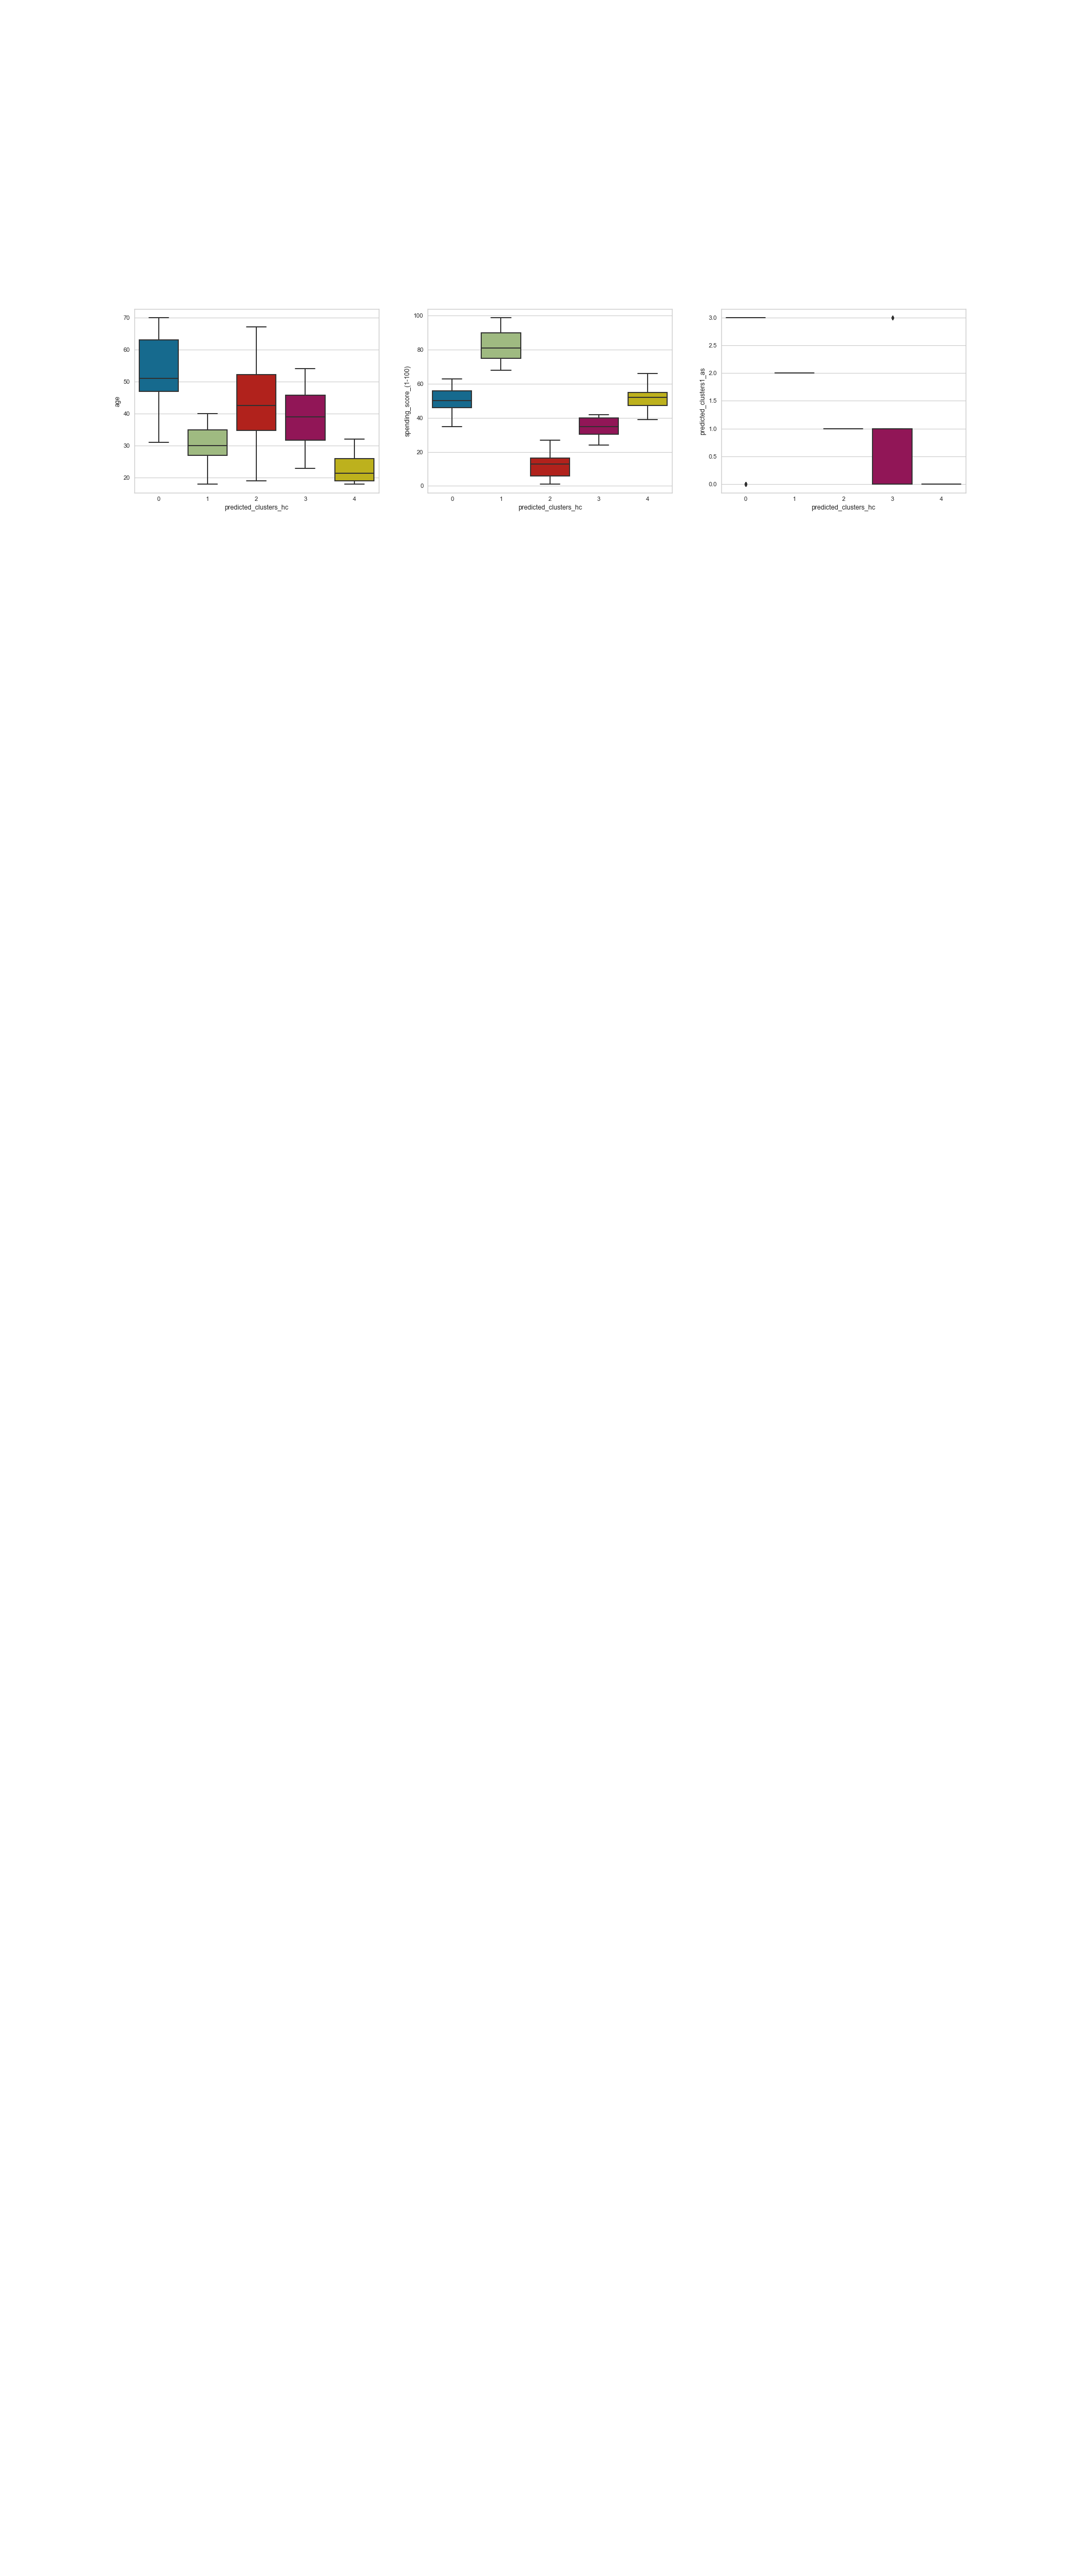

In [281]:
index = 0
plt.figure(figsize=(25, 60))

for feature in df1:
    if feature != "predicted_clusters_hc":
        index += 1
        plt.subplot(9, 3, index)
        sns.boxplot(x='predicted_clusters_hc', y=feature, data=df1)

In [ ]:
# df1.groupby("predicted_clusters_hc")["country"].unique()

In [ ]:
# df2["military_power"] = df2["predicted_clusters_hc"].map({  0 : "less_powerfull",
#                                                             1 : "powerfull",
#                                                             2 : "most_powerfull",
#                                                             3 : "more_powerfull",
#                                                             4 : "weak"})
# df2.head()

#### iii. *Visualizing and Labeling All the Clusters* 

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___